In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Load the dataset into a DataFrame
data = pd.read_csv('Cardiotocographic.csv')

In [3]:
data.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [4]:
data.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [26]:
#Handle missing values
#Display the count of missing values for each column
print(data.isnull().sum(), "\n")

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64 



In [31]:
# Impute missing values with the mean for numerical columns and the mode for categorical columns
for column in data.columns:
    if np.issubdtype(data[column].dtype, np.number):
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

In [7]:
print(data.head(), "\n")


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0   



In [32]:
#Identify and correct any inconsistencies in data types
print(data.dtypes, "\n")

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object 



In [33]:
#Detect and treat outliers
# Using Z-score to detect outliers in numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(data[numerical_columns]))

In [34]:
# Define a threshold for identifying outliers ( Z-score > 3)
outliers = (z_scores > 3)

In [11]:
# Display outliers
print("Outliers detected:")
print(data[numerical_columns][outliers.any(axis=1)], "\n")


Outliers detected:
         LB        AC        FM        UC        DL            DS        DP  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000e+00  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000e+00  0.002805   
8     122.0  0.038567  0.000000  0.001517  0.000000  0.000000e+00  0.000000   
13    131.0  0.009077  0.222390  0.006051  0.001513  0.000000e+00  0.000000   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.000000e+00  0.000826   
...     ...       ...       ...       ...       ...           ...       ...   
2033  129.0  0.000000  0.001122  0.006734  0.005767  4.249675e-06  0.002245   
2060  127.0  0.038567  0.000000  0.005663  0.000000  0.000000e+00  0.000000   
2075  130.0  0.007011  0.000876  0.000876  0.000000 -1.353180e-03  0.000000   
2088  133.0  0.000000  0.001236  0.006180  0.000000 -8.720000e-07  0.000000   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.000000e+00  0.000000   

           ASTV      MSTV  ALTV 

In [35]:
# Treat outliers by capping them at the 95th percentile
for column in numerical_columns:
    percentile_95 = data[column].quantile(0.95)
    data[column] = np.where(data[column] > percentile_95, percentile_95, data[column])

In [13]:
print(data.head(), "\n")

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

        MLTV  Width  Tendency  NSP  
0   2.400000   64.0  0.999926  2.0  
1  10.400000  130.0  0.000000  1.0  
2  13.400000  130.0  0.000000  1.0  
3  18.577044  117.0  1.000000  1.0  
4  18.577044  117.0  1.000000  1.0   



In [14]:
d_numeric = data.select_dtypes(include=['number'])
print(d_numeric)

              LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.029395  0.007426  0.000000  0.0  0.0  75.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  75.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  75.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  75.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV       MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2

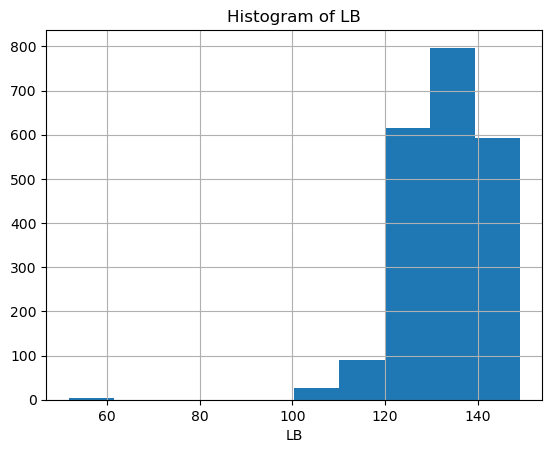

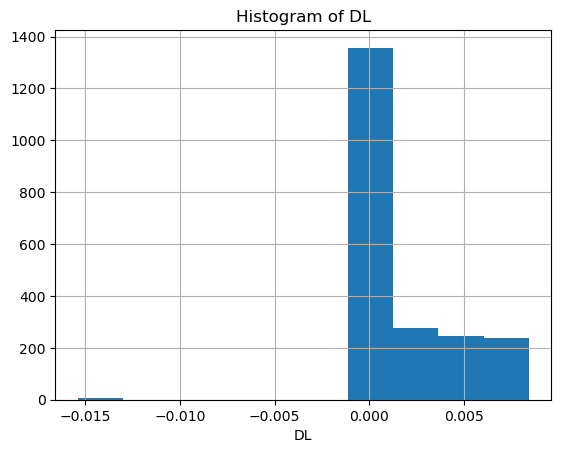

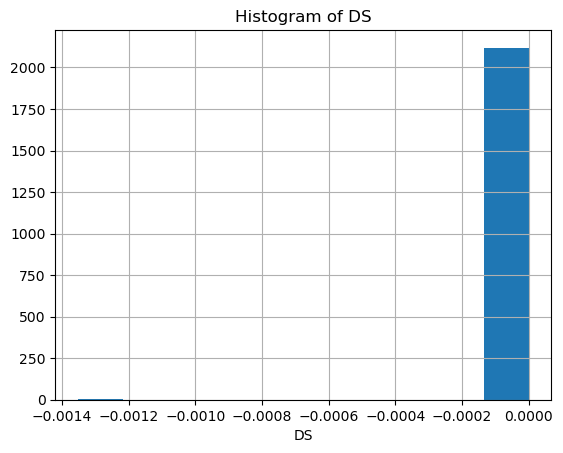

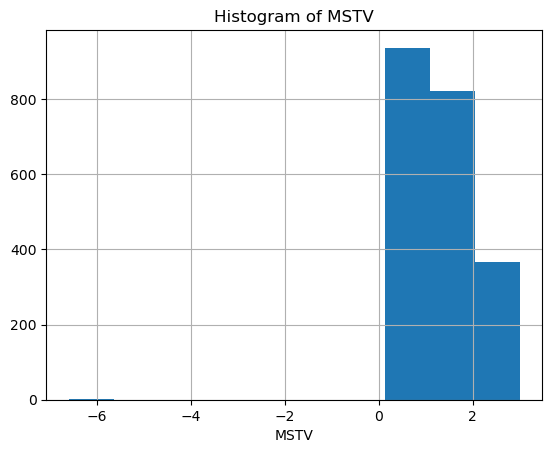

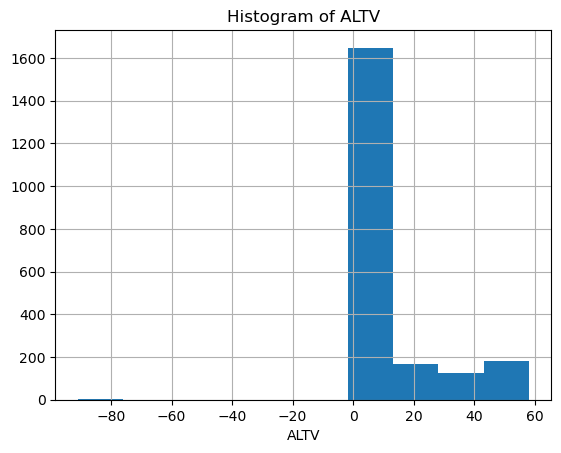

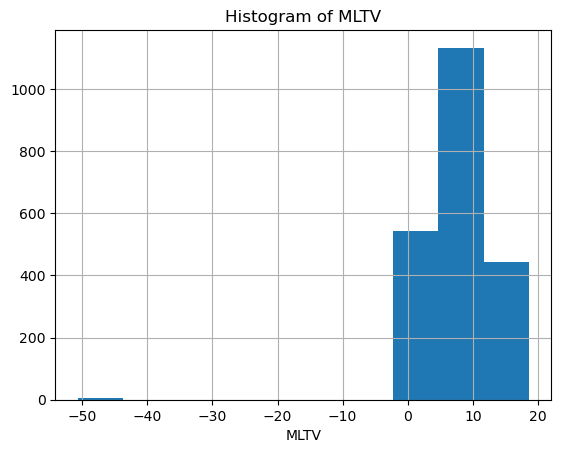

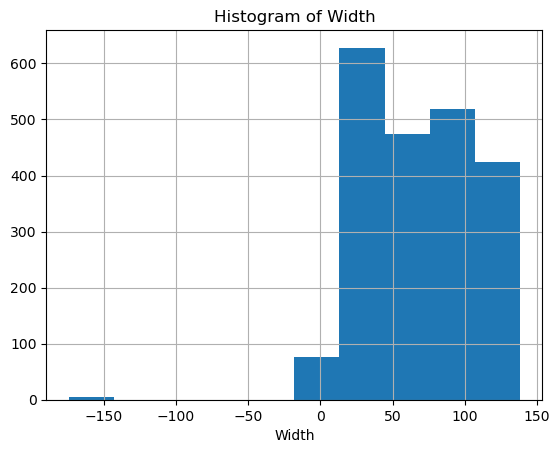

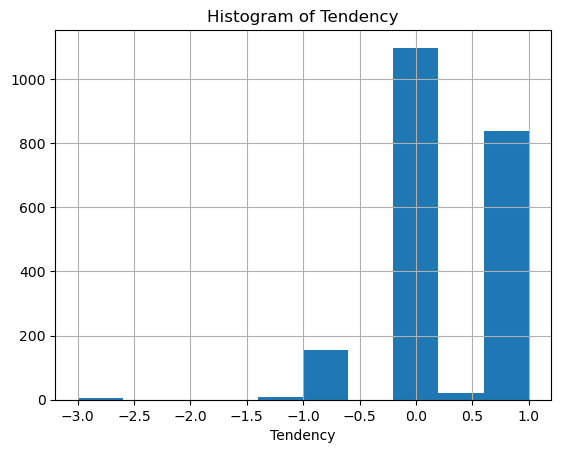

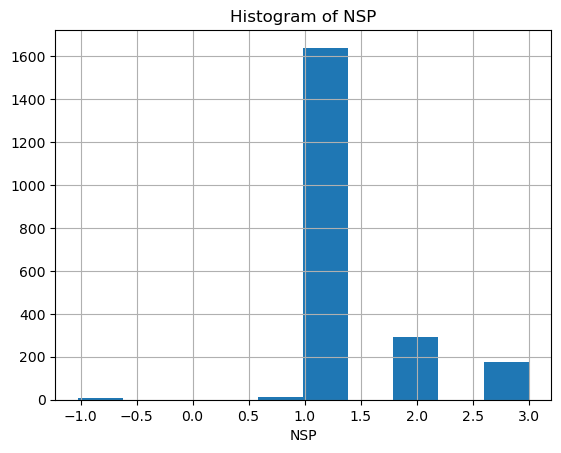

In [36]:
# Plotting Histogram 
for column in d_numeric.columns:
    plt.figure()
    d_numeric[column].hist()
    
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

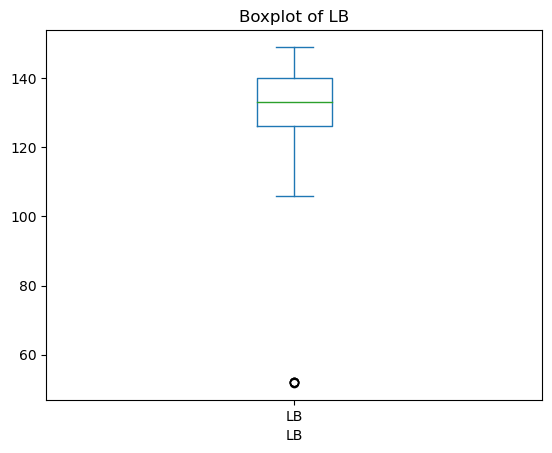

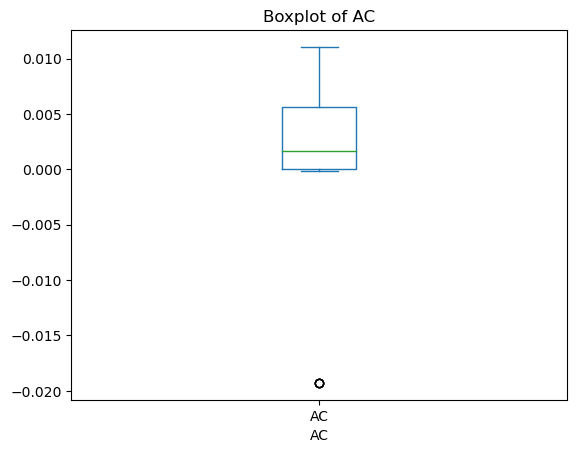

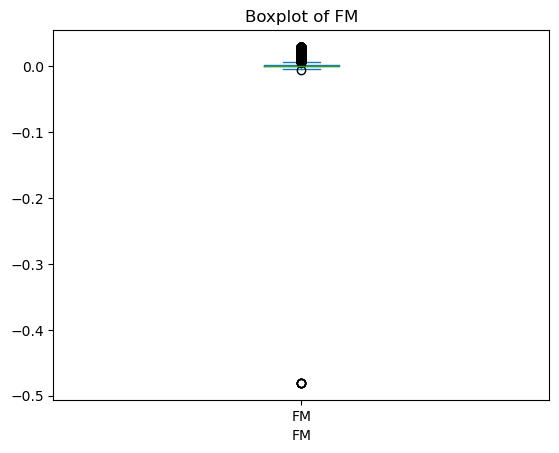

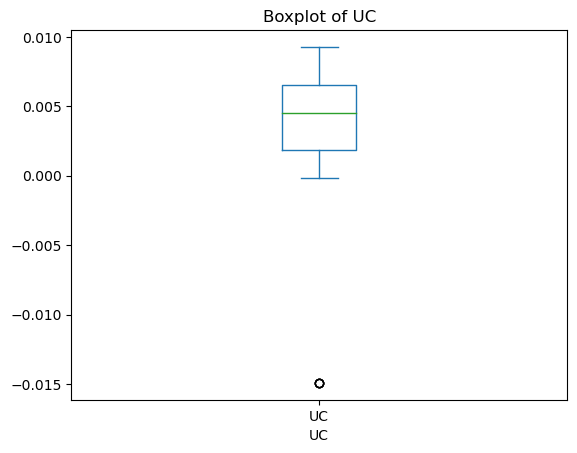

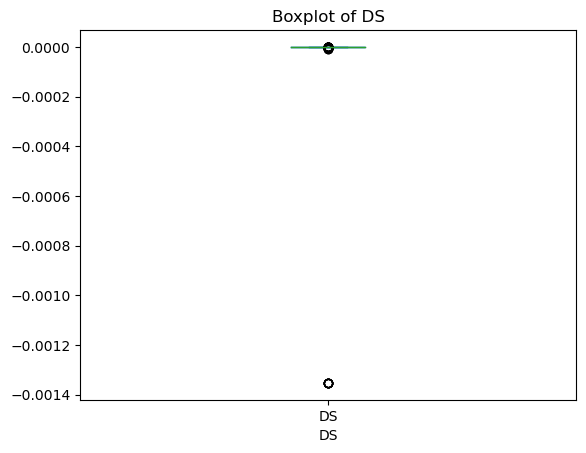

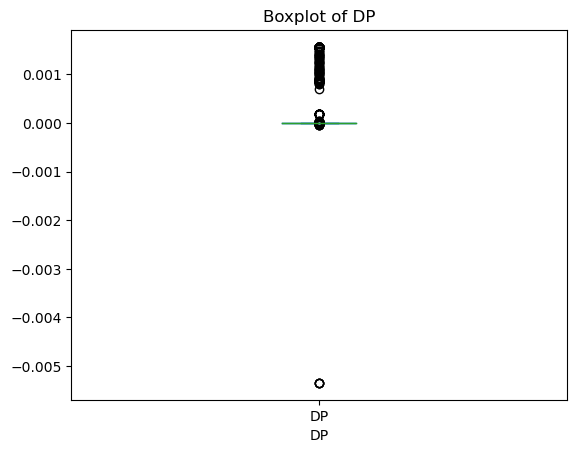

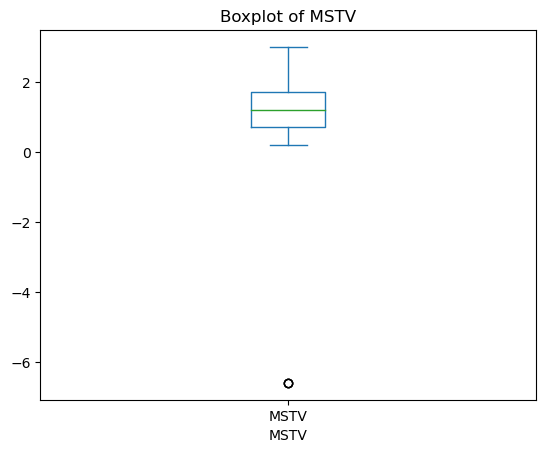

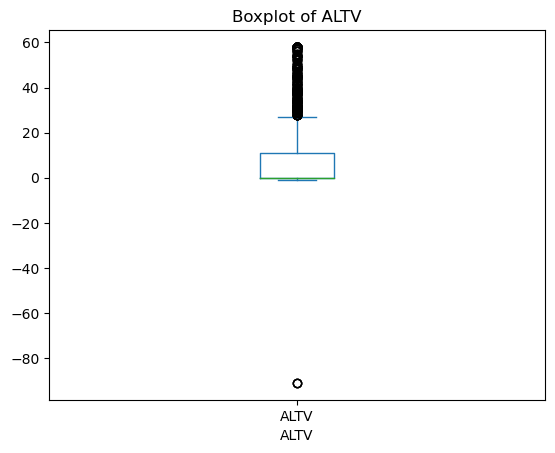

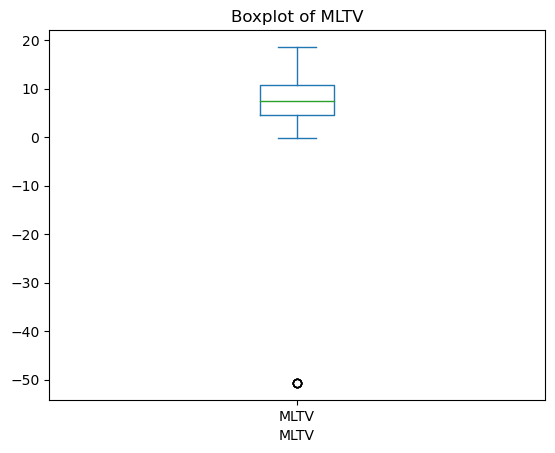

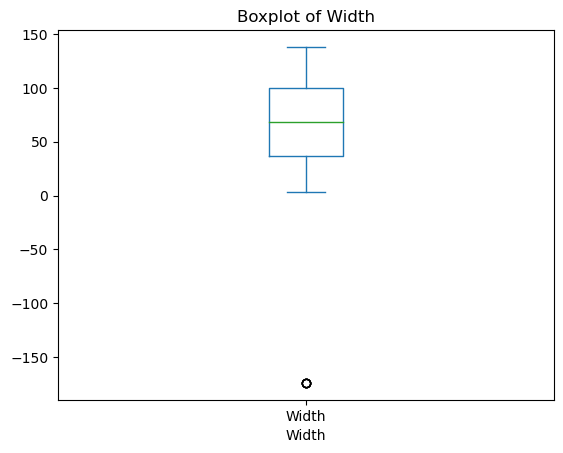

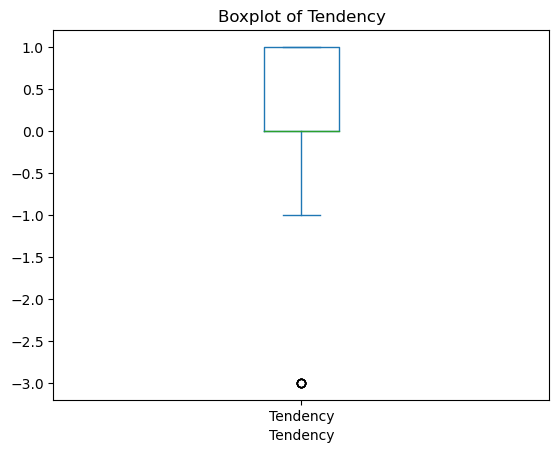

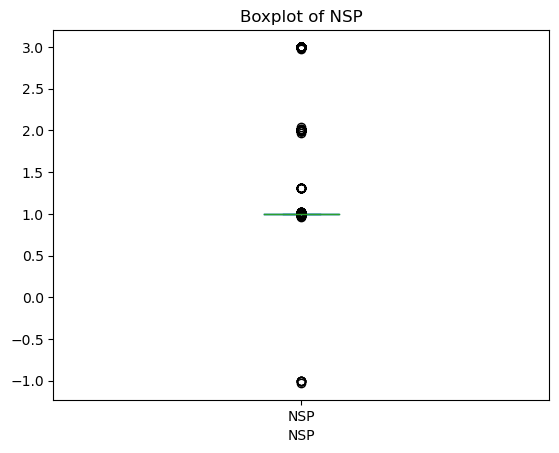

In [37]:
# Plotting boxplot
for column in d_numeric.columns:
    plt.figure()
    d_numeric[column].plot(kind = 'box')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

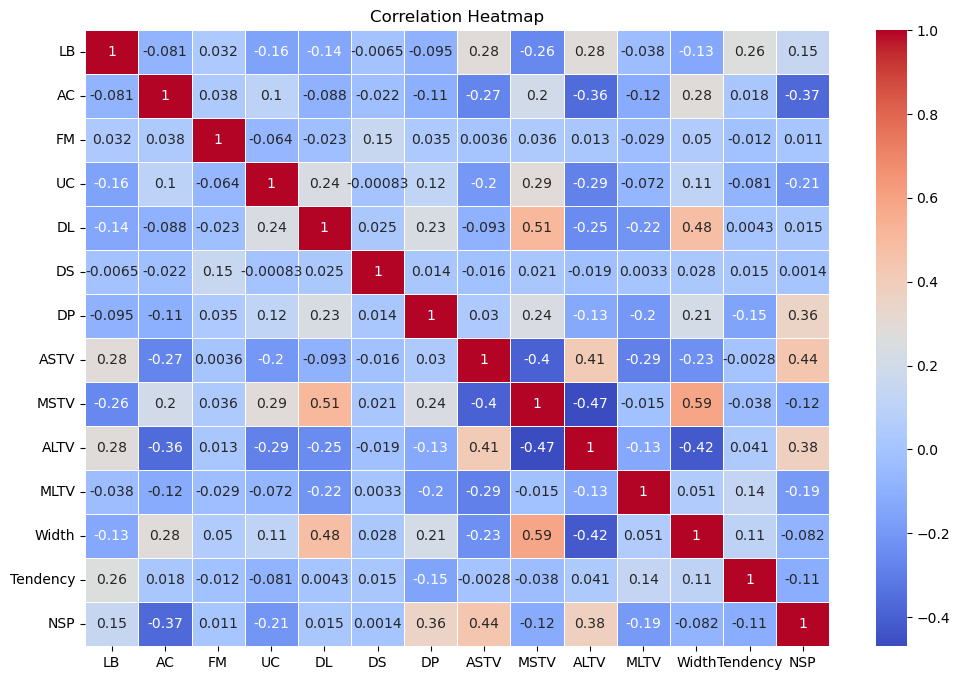

In [38]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
"""Positive correlation:
MSTV and Width: 0.59
DL and MSTV : 0.51
ASTV and NSP: 0.44

Negative correlation:
MSTV and ALTV: -0.47
ALTV and WIDTh: -0.42
NSP and DS: -0.4"""

C:\Users\vinit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


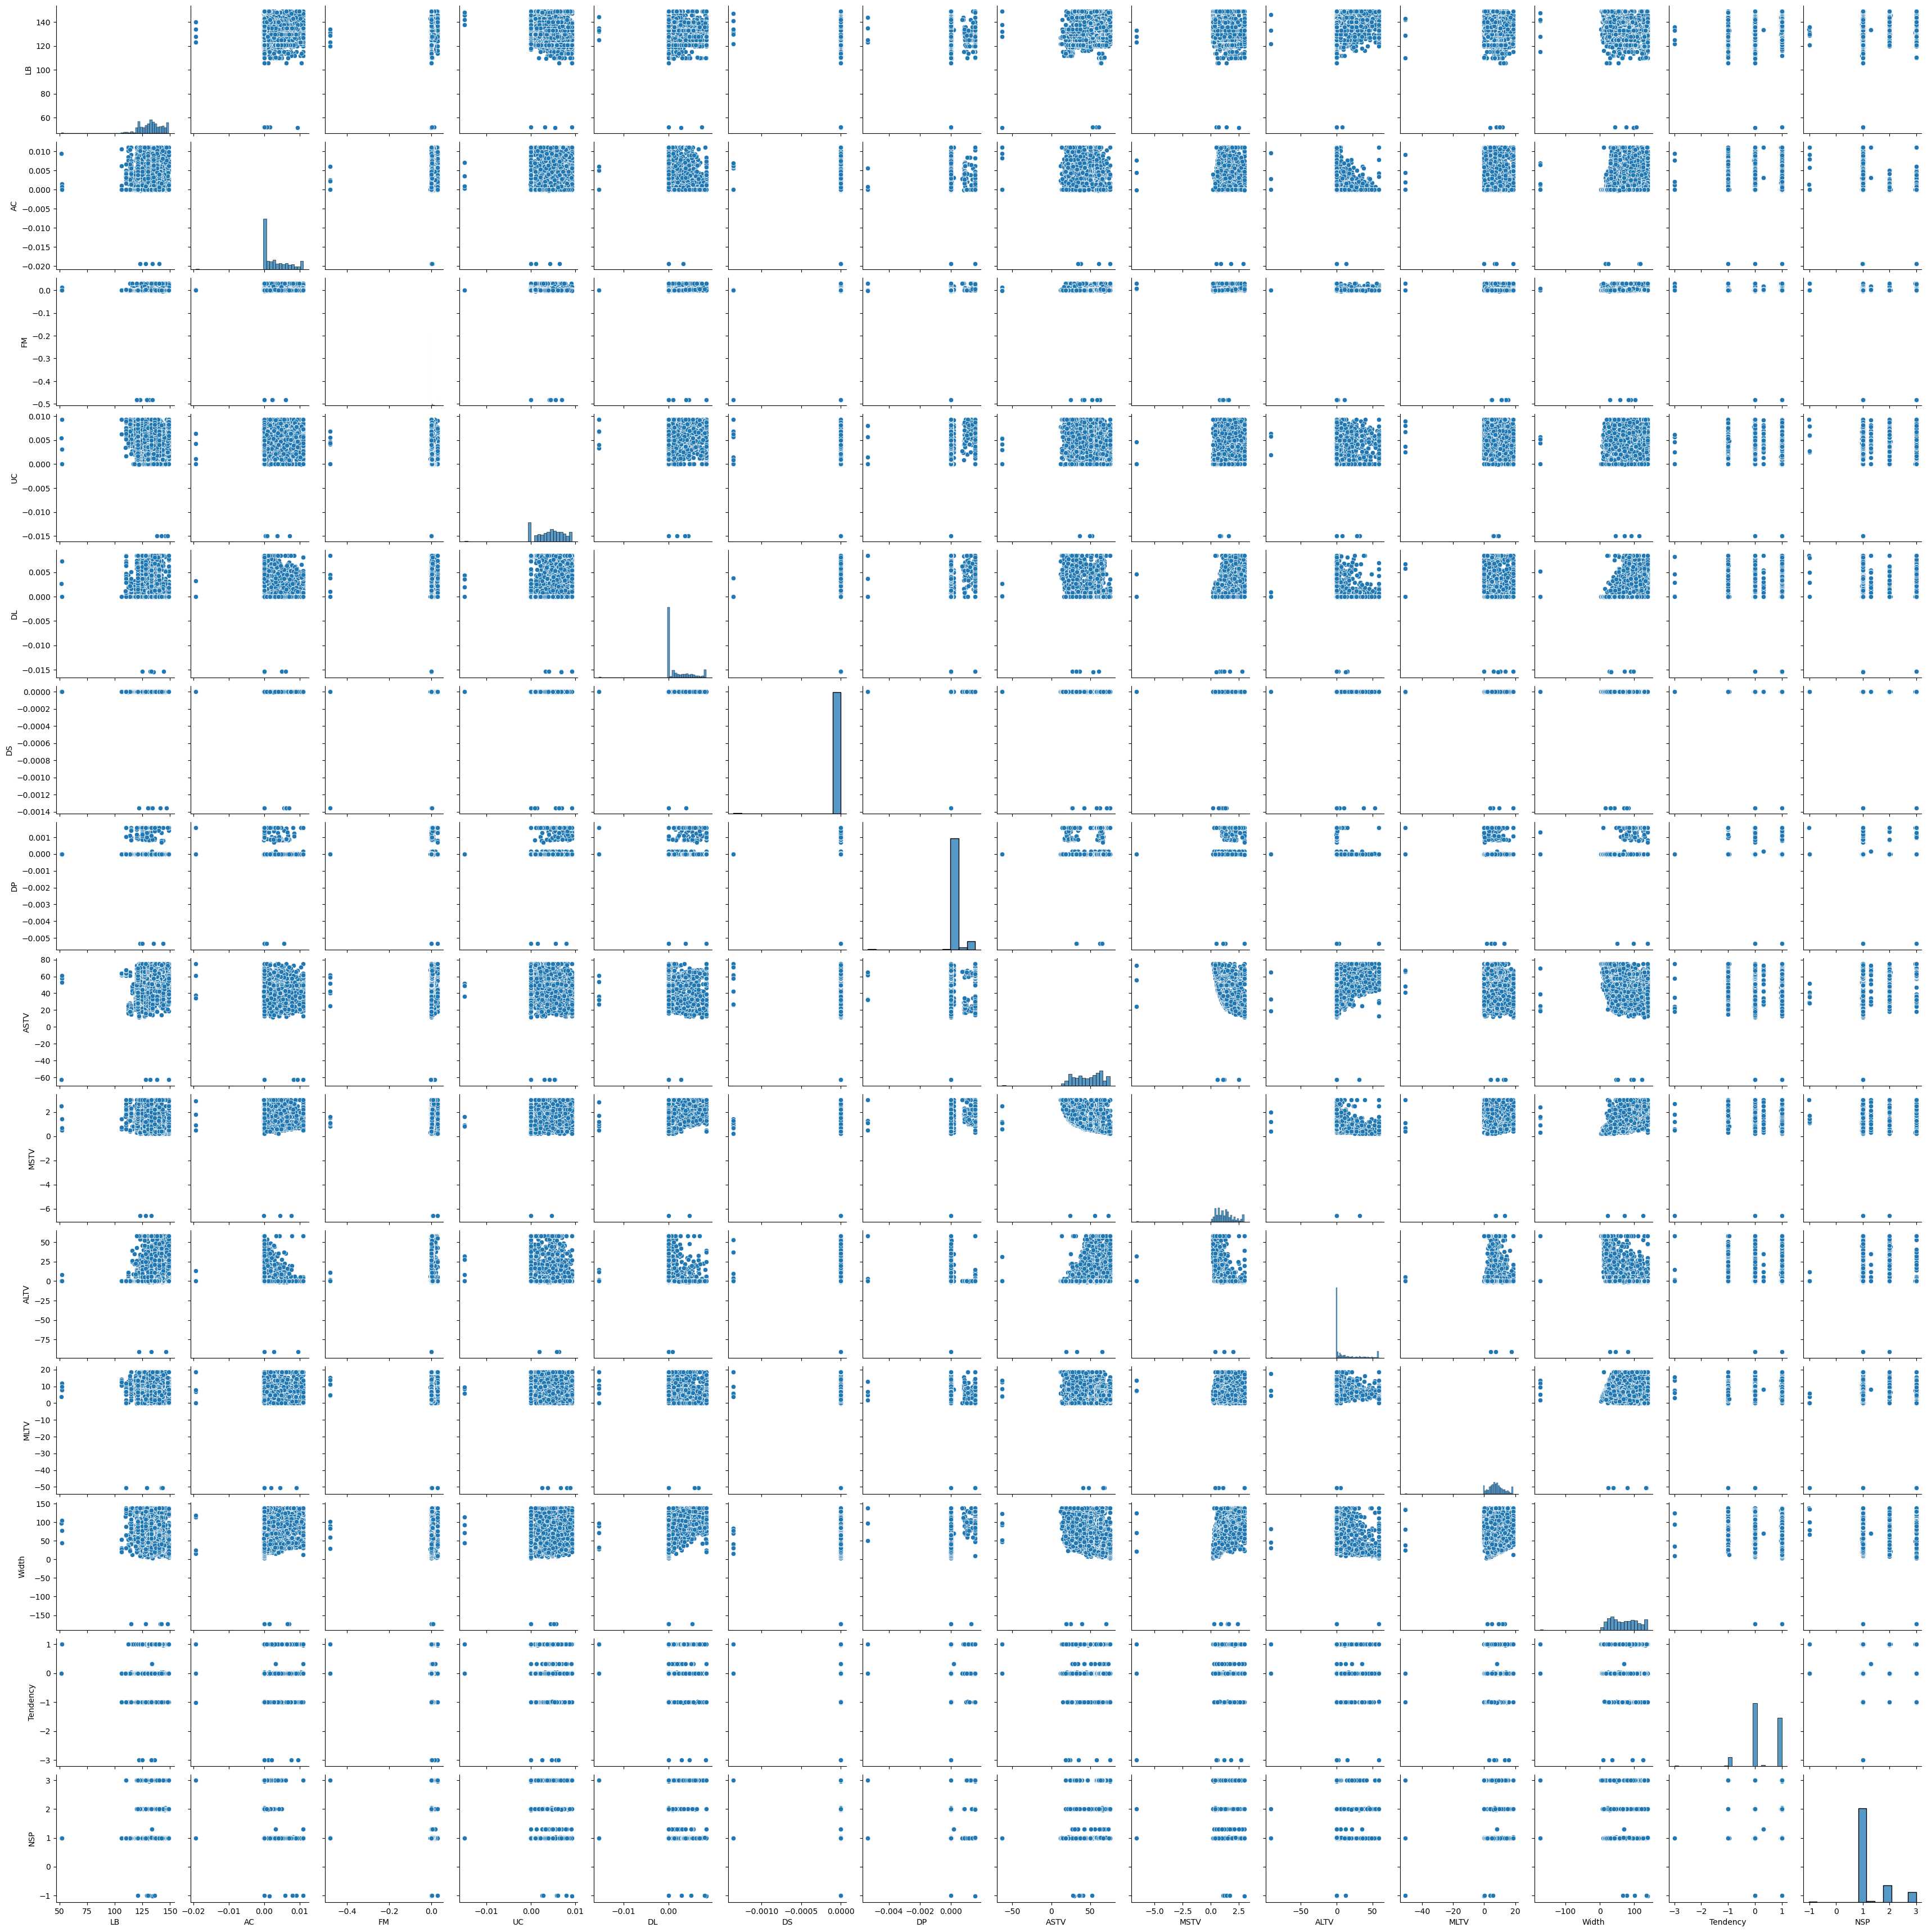

In [18]:
sns.pairplot(data[numerical_columns])
plt.show()


In [39]:
# Pattern Recognition and Insights
# Identify correlations 
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1)]
print("Strong Correlations (greater than 0.5):")
print(strong_correlations.dropna(how='all').dropna(axis=1, how='all'))


Strong Correlations (greater than 0.5):
             DL      MSTV     Width
DL          NaN  0.508262       NaN
MSTV   0.508262       NaN  0.590527
Width       NaN  0.590527       NaN
